# Linear Regression Project (Climate Dataset)

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [2]:

df = pd.read_csv(r"C:\Users\kpasw\Downloads\Climate Dataset new.csv")
df.head()


,City,State,Temperature_Max (°C),Temperature_Min (°C),Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,AQI_Category,Pressure (hPa),Cloud_Cover (%)
0,Mumbai,Maharashtra,32.5,18.0,25.2,77.6,0.0,3.3,259,Poor,1020.3,62.1
1,Delhi,Delhi,25.4,10.7,18.1,84.1,0.0,9.0,130,Moderate,1008.4,46.0
2,Bengaluru,Karnataka,37.2,30.8,34.0,49.0,3.7,6.6,54,Satisfactory,1008.0,61.3
3,Chennai,Tamil Nadu,37.2,30.4,33.8,34.2,9.5,9.0,176,Moderate,993.4,70.0
4,Kolkata,West Bengal,27.4,17.5,22.5,32.2,9.1,9.2,97,Satisfactory,1008.2,56.9


In [3]:
df.describe()

,Temperature_Max (°C),Temperature_Min (°C),Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,Pressure (hPa),Cloud_Cover (%)
count,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000
mean,34.952161,25.006402,29.980192,62.653516,8.231300,13.522763,193.759508,1007.358577,52.630055
std,5.781372,6.476264,5.966698,18.680171,17.758208,6.562729,89.182569,10.109978,27.327729
min,25.000000,10.100000,17.600000,30.000000,0.000000,2.000000,40.000000,990.000000,5.000000
25%,30.000000,19.900000,25.000000,46.400000,0.000000,7.900000,116.000000,998.700000,28.925000
50%,34.900000,25.000000,30.000000,62.700000,0.000000,13.500000,194.000000,1007.300000,52.700000
75%,40.000000,30.000000,35.000000,78.700000,6.300000,19.100000,270.000000,1016.200000,76.200000
max,45.000000,39.800000,42.300000,95.000000,79.900000,25.000000,349.000000,1025.000000,100.000000


In [4]:

df.isnull().sum()


City                    0
State                   0
Temperature_Max (°C)    0
Temperature_Min (°C)    0
Temperature_Avg (°C)    0
Humidity (%)            0
Rainfall (mm)           0
Wind_Speed (km/h)       0
AQI                     0
AQI_Category            0
Pressure (hPa)          0
Cloud_Cover (%)         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310 entries, 0 to 7309
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  7310 non-null   object 
 1   State                 7310 non-null   object 
 2   Temperature_Max (°C)  7310 non-null   float64
 3   Temperature_Min (°C)  7310 non-null   float64
 4   Temperature_Avg (°C)  7310 non-null   float64
 5   Humidity (%)          7310 non-null   float64
 6   Rainfall (mm)         7310 non-null   float64
 7   Wind_Speed (km/h)     7310 non-null   float64
 8   AQI                   7310 non-null   int64  
 9   AQI_Category          7310 non-null   object 
 10  Pressure (hPa)        7310 non-null   float64
 11  Cloud_Cover (%)       7310 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 685.4+ KB


<Axes: >

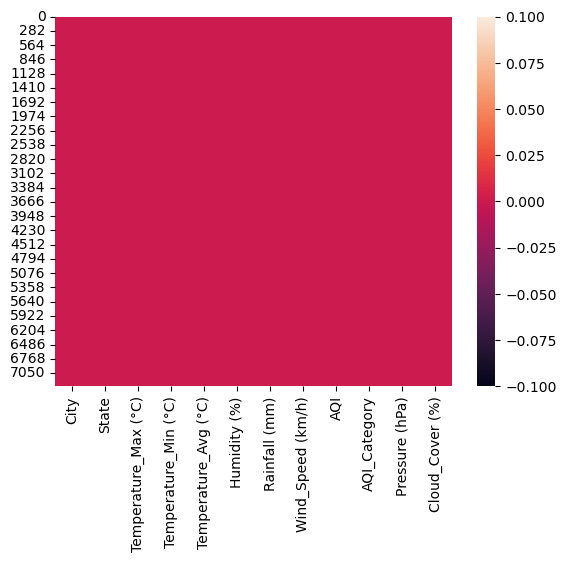

In [6]:
sns.heatmap(df.isna())

In [7]:
col='Wind_Speed (km/h)'
drop_idx=df[df[col].notna()].sample(frac=0.18,random_state=42).index
df.loc[drop_idx,col]=np.nan

In [8]:
col='AQI_Category'
drop_idx=df[df[col].notna()].sample(frac=0.01,random_state=42).index
df.loc[drop_idx,col]=np.nan

In [9]:
df['Wind_Speed (km/h)'].fillna(df['Wind_Speed (km/h)'].median(),inplace=True)
df['AQI_Category'].fillna(df['AQI_Category'].mode()[0],inplace=True)


In [10]:

df.isnull().sum()


City                    0
State                   0
Temperature_Max (°C)    0
Temperature_Min (°C)    0
Temperature_Avg (°C)    0
Humidity (%)            0
Rainfall (mm)           0
Wind_Speed (km/h)       0
AQI                     0
AQI_Category            0
Pressure (hPa)          0
Cloud_Cover (%)         0
dtype: int64

<Axes: >

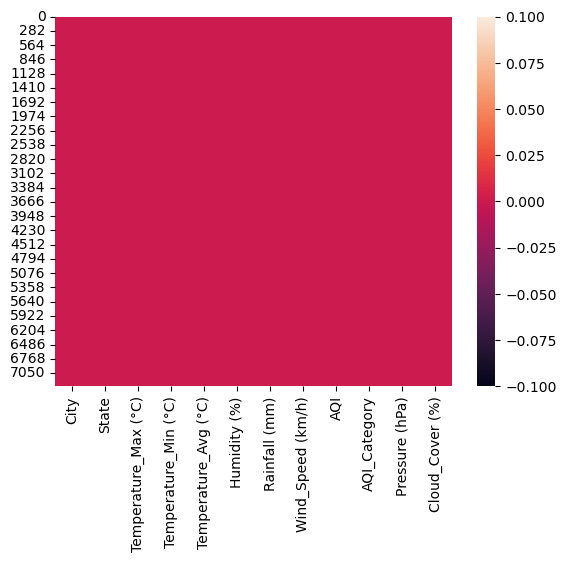

In [11]:
sns.heatmap(df.isna())

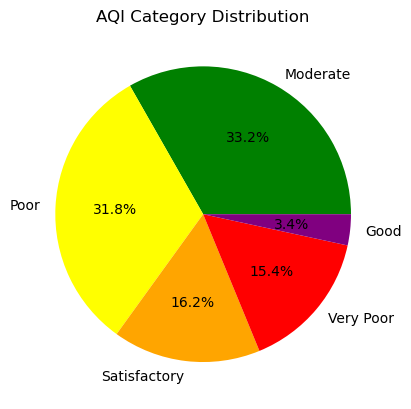

In [12]:
plt.figure()
df['AQI_Category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['green','yellow','orange','red','purple']
)
plt.title('AQI Category Distribution')
plt.ylabel('')
plt.show()


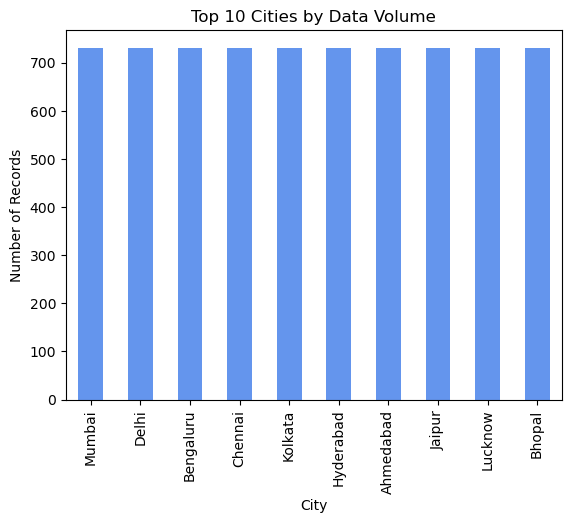

In [13]:
plt.figure()
df['City'].value_counts().head(10).plot.bar(color='cornflowerblue')
plt.title('Top 10 Cities by Data Volume')
plt.xlabel('City')
plt.ylabel('Number of Records')
plt.show()


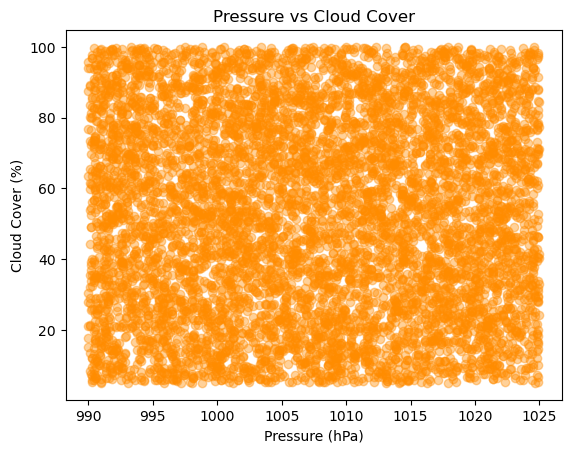

In [14]:
plt.figure()
plt.scatter(df['Pressure (hPa)'], df['Cloud_Cover (%)'],
            alpha=0.4, color='darkorange')
plt.title('Pressure vs Cloud Cover')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Cloud Cover (%)')
plt.show()


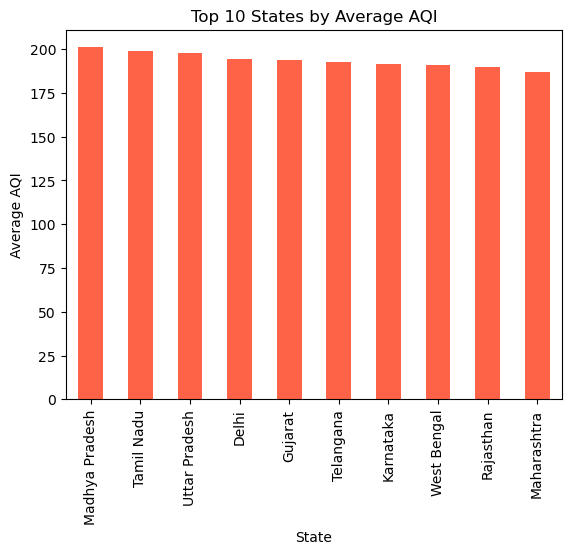

In [15]:
plt.figure()
df.groupby('State')['AQI'].mean().sort_values(ascending=False).head(10)\
  .plot.bar(color='tomato')
plt.title('Top 10 States by Average AQI')
plt.ylabel('Average AQI')
plt.show()


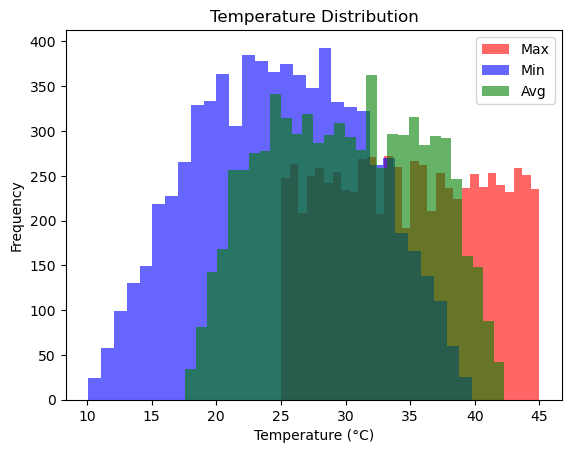

In [16]:
plt.figure()
plt.hist(df['Temperature_Max (°C)'], bins=30, alpha=0.6, label='Max', color='red')
plt.hist(df['Temperature_Min (°C)'], bins=30, alpha=0.6, label='Min', color='blue')
plt.hist(df['Temperature_Avg (°C)'], bins=30, alpha=0.6, label='Avg', color='green')
plt.legend()
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


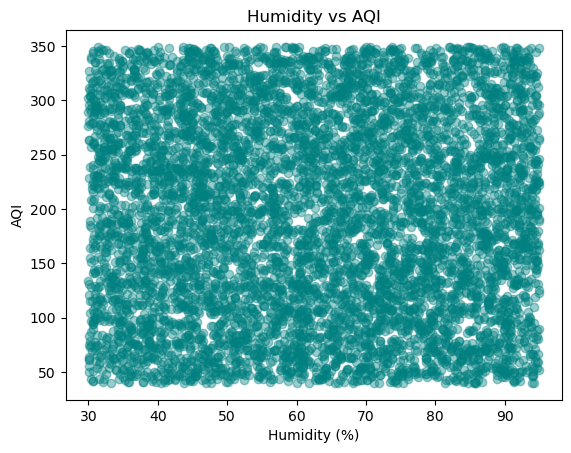

In [17]:
plt.figure()
plt.scatter(df['Humidity (%)'], df['AQI'], alpha=0.4, color='teal')
plt.title('Humidity vs AQI')
plt.xlabel('Humidity (%)')
plt.ylabel('AQI')
plt.show()


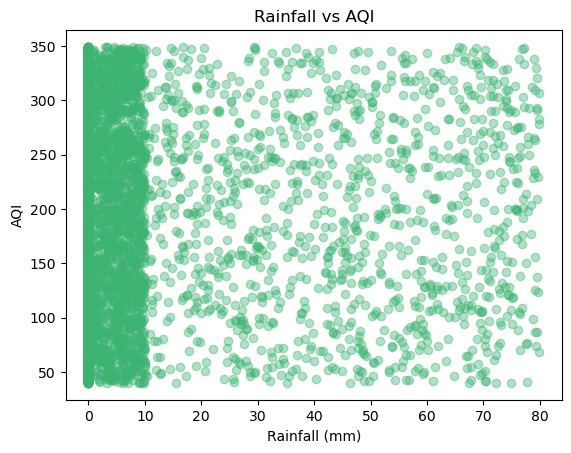

In [18]:
plt.figure()
plt.scatter(df['Rainfall (mm)'], df['AQI'], alpha=0.4, color='mediumseagreen')
plt.title('Rainfall vs AQI')
plt.xlabel('Rainfall (mm)')
plt.ylabel('AQI')
plt.show()


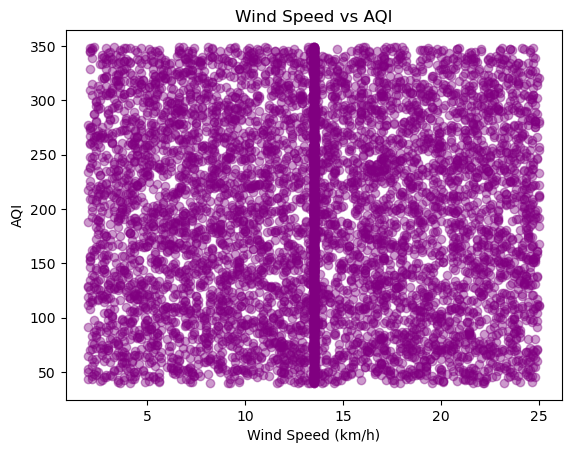

In [19]:
plt.figure()
plt.scatter(df['Wind_Speed (km/h)'], df['AQI'], alpha=0.4, color='purple')
plt.title('Wind Speed vs AQI')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('AQI')
plt.show()


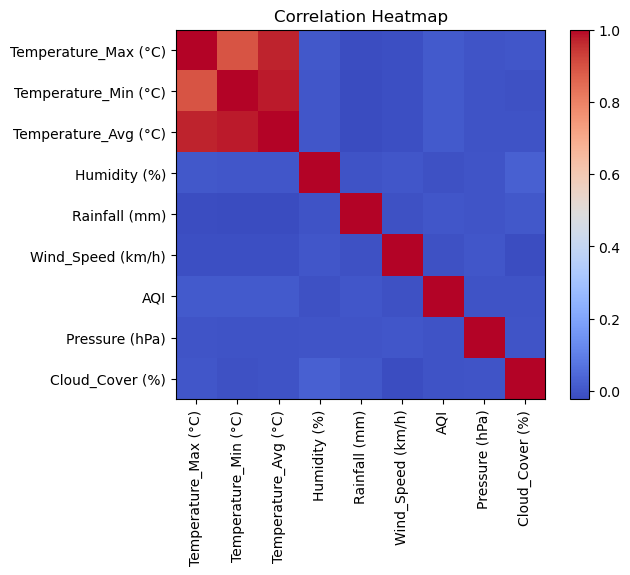

In [20]:
plt.figure()
corr = df.select_dtypes(include=['float64','int64']).corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()


In [21]:

x= df.drop('Temperature_Avg (°C)', axis=1)
y= df['Temperature_Avg (°C)']


In [22]:

x= x.select_dtypes(include='number')


In [23]:


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [24]:

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)


In [25]:

models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet()
}
results ={}


In [26]:

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSR":root_mean_squared_error(y_test, y_pred)
    }
results


{'Linear': {'R2': 0.9999641801914507,
  'MSE': 0.0012595655240766202,
  'MAE': 0.025710736001624022,
  'RMSR': 0.0354903581846763},
 'Lasso': {'R2': 0.9703945617521573,
  'MSE': 1.0410437925933818,
  'MAE': 0.8715861447915564,
  'RMSR': 1.0203155357992848},
 'Ridge': {'R2': 0.9999641511056303,
  'MSE': 0.0012605882960582061,
  'MAE': 0.0257876130873921,
  'RMSR': 0.035504764413500985},
 'ElasticNet': {'R2': 0.9234570095505819,
  'MSE': 2.691552964249999,
  'MAE': 1.3966261390054147,
  'RMSR': 1.640595307883696}}

In [27]:

results_df = pd.DataFrame(results).T
results_df


,R2,MSE,MAE,RMSR
Linear,0.999964,0.001260,0.025711,0.035490
Lasso,0.970395,1.041044,0.871586,1.020316
Ridge,0.999964,0.001261,0.025788,0.035505
ElasticNet,0.923457,2.691553,1.396626,1.640595


# Linear Regression Project with Grid Search (Climate Dataset)

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

In [29]:
# models=[Ridge(),LinearRegression(),Lasso(),ElasticNet()]
# for model in models:
    
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])


In [30]:
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['auto', 'svd', 'cholesky']
}


In [31]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100],
                         'model__solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [32]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'model__alpha': 0.01, 'model__solver': 'auto'}
Best CV Score: 0.99996465231793


In [76]:
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9999641799845461
RMSE: 0.03549046068528259


In [ ]:
# models = {
#     "Linear": LinearRegression(),
#     "Lasso": Lasso(),
#     "Ridge": Ridge(),
#     "ElasticNet": ElasticNet()
# }
# results ={}
